In [1]:
%config Completer.use_jedi = False
import warnings

warnings.filterwarnings(action='ignore')

# DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
DBSCAN은 데이터의 공간을 다루는 알고리즘으로 DBSCAN은 전체 공간에서 데이터가 가장 밀집된 영역을 찾는다. 그리고 그 밀집된 영역이 하나의 클러스터가 되며, 밀집 정도가 낮은 영역을 클러스터 외부 영역으로 구분한다. 이때, 밀집 정도를 파악하기 위해 데이터 포인트간 거리를 측정하게 되는데, 거리를 어떤 방법으로 측정하느냐에 따라 크러스터링 형태가 달라진다.

DBSCAN에서 거리 측정 방법은 DBSCAN 함수에서 조절 가능하며, 기본값은 유클리드 거리를 사용한다. DBSCAN은 클러스터 개수를 사전에 정하지 않아도 된다는 장점이 있다.

DBSCAN의 핵심 아이디어는 일정 반경 내에 최소한의 데이터 포인트 개수 이상이 존재한다는 것으로 반경과 최소한의 데이터 포인트 개수가 DBSCAN의 필수 요소이다.

DBSCAN 실습

In [2]:
# 데이터 생성
# make_moons 함수는 초승달 모양의 클러스터 두 개 형상의 데이터를 생성한다. make_moons 함수로 만든 데이터는 직선을
# 사용하여 분류할 수 없다.
from sklearn.datasets import make_moons  # 클러스터링용 가상 데이터를 사용하기 위해 import 한다.

# n_samples 옵션은 전체 데이터의 개수이며, noise 옵션으로 데이터가 흩어지는 정도를 지정한다.
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)  # make_moons 함수로 클러스터링용 가상 데이터를 만든다.
X.shape, y.shape

((300, 2), (300,))

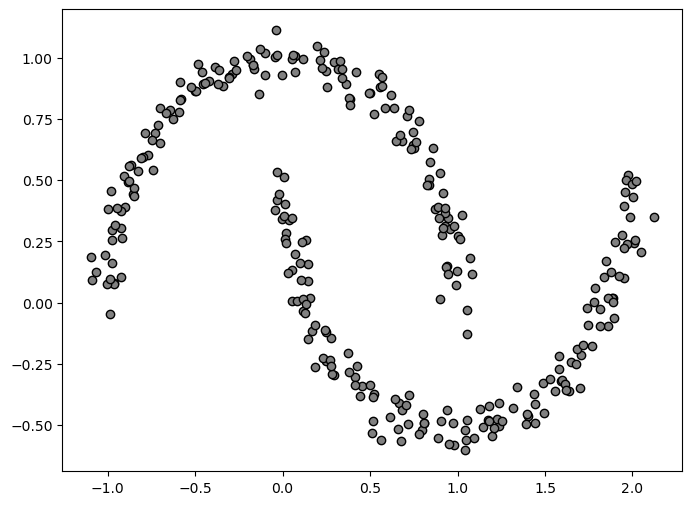

In [3]:
# 라벨링되지 않은 데이터 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 6])
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

In [4]:
# DBSCAN
from sklearn.cluster import DBSCAN  # DBSCAN 클러스터링에 사용하기 위해 import 한다.

# min_samples 옵션으로 최소한의 데이터 포인트 개수(기본값은 5) 지정하고 eps 옵션으로 데이터 포인터 개수를 측정할
# 반경을 지정해서 DBSCAN 객체를 만든다.
dbs = DBSCAN(min_samples=5, eps=0.2)
dbs.fit(X)  # DBSCAN 모델을 학습시킨다.
label_dbs = dbs.labels_  # labels_ 속성으로 데이터를 어떻게 클러스터링했는지 확인할 수 있다.
label_dbs

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [5]:
# DBSCAN 클러스터링 적용 후 데이터를 데이터프레임으로 만든다.
import pandas as pd  # 데이터프레임 형태로 만들기 위해서 판다스 라이브러리를 import 한다.

dbs_columns = ['dbs_comp1', 'dbs_comp2']  # 데이터프레임의 열 이름을 정한다.
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)  # DBSCAN 클러스터링된 데이터를 데이터프레임으로 만든다.
X_dbs_df['target'] = y  # 데이터프레임에 타겟 데이터를 결합한다.
X_dbs_df['label_dbs'] = label_dbs  # 데이터프레임에 클러스터링한 라벨을 결합한다.
X_dbs_df

,dbs_comp1,dbs_comp2,target,label_dbs
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,1,0
2,0.943261,0.346800,0,1
3,0.973742,-0.492901,1,0
4,1.239713,-0.411411,1,0
...,...,...,...,...
295,1.530635,-0.311922,1,0
296,0.275923,-0.259083,1,0
297,-0.742257,0.541587,0,1
298,0.570287,0.921368,0,1


In [6]:
# 타겟 클래스, 클러스터링 라벨 종류 확인
set(X_dbs_df['target']), set(X_dbs_df['label_dbs'])

({0, 1}, {0, 1})

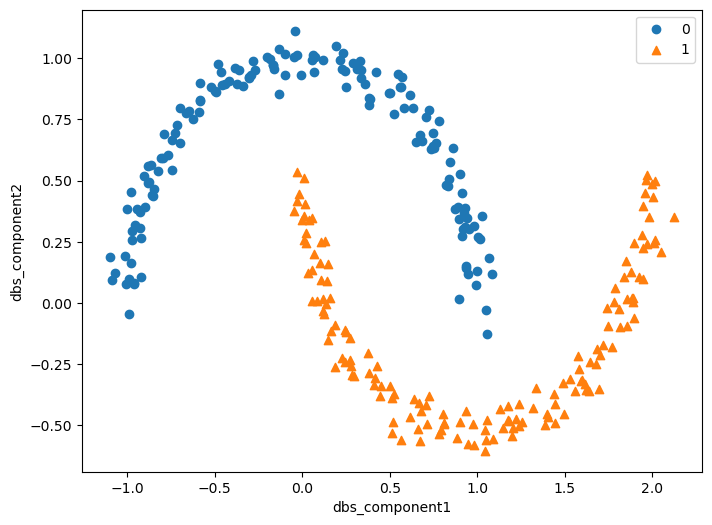

In [7]:
# 실제 타겟을 이용한 데이터 시각화
df = X_dbs_df
markers = ['o', '^']  # 시각화에 사용할 마커를 지정한다.
plt.figure(figsize=[8, 6])

# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    df_index = df[df['target'] == index]  # i번째 실제 데이터에 해당되는 데이터만 추출한다.
    target_index = index  # 타겟 이름을 얻어온다.
    X1 = df_index['dbs_comp1']  # DBSCAN 클러스터링된 데이터의 첫 번째 벡터를 얻어온다.
    X2 = df_index['dbs_comp2']  # DBSCAN 클러스터링된 데이터의 두 번째 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index)  # 산포도를 그린다.
# =====

plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

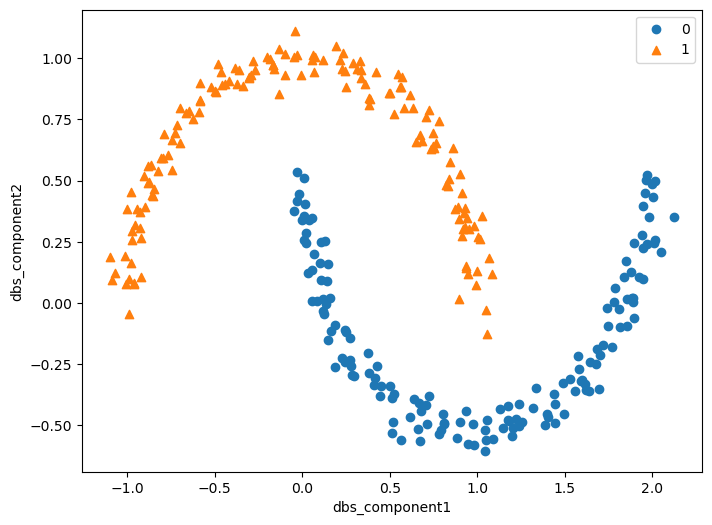

In [8]:
# DBSCAN 클러스터링 적용 데이터 시각화
df = X_dbs_df
markers = ['o', '^']  # 시각화에 사용할 마커를 지정한다.
plt.figure(figsize=[8, 6])

# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    # DBSCAN 클러스터링으로 라벨링한 데이터 중 i번째 클러스터에 해당되는 데이터만 추출한다.
    df_index = df[df['label_dbs'] == index]
    target_index = index  # 타겟 이름을 얻어온다.
    X1 = df_index['dbs_comp1']  # DBSCAN 클러스터링된 데이터의 첫 번째 벡터를 얻어온다.
    X2 = df_index['dbs_comp2']  # DBSCAN 클러스터링된 데이터의 두 번째 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index)  # 산포도를 그린다.
# =====

plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

In [9]:
# 모형 평가
from sklearn.metrics import silhouette_score  # KMeans 클러스터링을 통해 만들어진 모형 평가를 위해 import 한다.

# silhouette_score() 함수의 인수로 실제 피쳐값 X와 라벨링값 label_dbs을 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(X, label_dbs)
sil_score

0.32847820126315047